In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### Import training data

In [2]:
train_df = pd.read_csv("data/training.txt", sep = '\t', encoding = 'iso-8859-1')

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (98,99,100,111,114,115,116,118,119,120,121,123,124,125,126) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [48]:
pd.options.display.max_columns = 145

In [49]:
train_df.head()

BuildingID       County                 Type     Year       RatingType  \
0      190835  Co. Wexford    Mid-terrace house  Y1890.0  Existing          
1      523113    Co. Clare       Detached house  Y1901.0  Existing          
2      271393    Co. Kerry       Detached house  Y1968.0  Existing          
3      585961     Co. Cork  Semi-detached house  Y2002.0  Existing          
4      624083    Co. Laois       Detached house  Y2002.0  Existing          

  EnergyRatingCat  EnergyRatingCont GroundFloorArea  AvgWallU  AvgRoofU  \
0              F             418.42     52.04 sq. m      2.10      2.30   
1              G             520.35    147.44 sq. m      2.01      0.75   
2              D2            281.33    104.84 sq. m      0.38      0.13   
3              C2            188.17     95.31 sq. m      0.55      0.26   
4              B3            134.95    283.87 sq. m      0.55      0.26   

   AvgFloorU  AvgWindowU  AvgDoorU  ExposedWallArea  ExposedRoofArea  \
0       0.61        2.71      3.00            32.78            73.08   
1       0.94        2.63      3.96           211.22            93.40   
2       0.68        2.81      0.00            94.41           104.84   
3       0.34        2.80      3.03            89.50            42.90   
4       0.41        3.10      3.01           254.15           173.21   

   TotFloorArea  TotWindowArea  TotDoorArea  NStoreys  \
0         33.69           7.08         2.05       2.0   
1         96.77          37.00         5.95       2.0   
2        104.84          17.90         0.00       1.0   
3         52.41          13.92         2.60       2.0   
4        173.21          42.86         5.49       2.0   

                       MainSHFuel                      MainWHFuel  \
0  Heating Oil                     Heating Oil                      
1  Heating Oil                     Heating Oil                      
2  Heating Oil                     Heating Oil                      
3  Mains Gas                       Mains Gas                        
4  Mains Gas                       Mains Gas                        

   MainSHEfficiency SharedMPRN  BuildingReg  MainSHAdj  SecSHFrac  \
0              85.7         NO          0.0       0.95        0.1   
1              65.0         NO          0.0       0.95        0.1   
2              70.0         NO          0.0       0.95        0.1   
3              78.0         NO          0.0       1.00        0.1   
4               NaN         NO          0.0       1.00        0.0   

   SecSHEfficiency  MainWHEfficiency  MainWHAdj  SecSHFuel  SecWHFuel  \
0             65.0              85.7       0.95        1.0       28.0   
1             55.0              65.0       0.95       15.0       28.0   
2             60.0              70.0       0.95       15.0        1.0   
3             30.0              78.0       1.00        8.0       28.0   
4              0.0              92.4       1.00        1.0        1.0   

   NChimneys  NOpenFlues  NFansVents DLobby     VentMethod  \
0        0.0         1.0         1.0     NO  Natural vent.   
1        1.0         0.0         0.0     NO  Natural vent.   
2        0.0         1.0         1.0     NO  Natural vent.   
3        1.0         0.0         5.0     NO  Natural vent.   
4        0.0         0.0         3.0     NO  Natural vent.   

                    WallStructure                   SuspWoodFloor  \
0  Masonry                         No                               
1  Masonry                         No                               
2  Masonry                         No                               
3  Masonry                         No                               
4  Masonry                         No                               

   PercDraughtStripped  NShelteredSides PermTest  PermTestResult  TempAdj  \
0                100.0              3.0       NO             0.0      0.0   
1                100.0              0.0       NO             0.0      0.6   
2                100.0   

In [50]:
train_df.ix[:,1:].describe()

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


EnergyRatingCont       AvgWallU       AvgRoofU      AvgFloorU  \
count     464502.000000  418057.000000  464502.000000  464502.000000   
mean         260.502160       0.681326       0.368432       0.448594   
std          208.511406       0.561282       0.495978       0.243910   
min          -63.960000       0.000000       0.000000       0.000000   
25%                 NaN            NaN            NaN            NaN   
50%                 NaN            NaN            NaN            NaN   
75%                 NaN            NaN            NaN            NaN   
max        56423.710000       5.650000       7.000000       7.760000   

          AvgWindowU       AvgDoorU  ExposedWallArea  ExposedRoofArea  \
count  464502.000000  464502.000000    464502.000000    464502.000000   
mean        2.766202       2.502561        91.043766        69.081900   
std         0.795336       1.012556        52.389315        50.392556   
min         0.000000       0.000000         0.000000         0.000000   
25%              NaN            NaN              NaN              NaN   
50%              NaN            NaN              NaN              NaN   
75%              NaN            NaN              NaN              NaN   
max         6.000000       8.600000      1138.800000       932.870000   

        TotFloorArea  TotWindowArea    TotDoorArea       NStoreys  \
count  464502.000000  464502.000000  464502.000000  464502.000000   
mean       66.008098      19.129119       2.817438       1.708602   
std        46.193947      13.687097       2.826768       0.569351   
min         0.000000       0.000000       0.000000       0.000000   
25%              NaN            NaN            NaN            NaN   
50%              NaN            NaN            NaN            NaN   
75%              NaN            NaN            NaN            NaN   
max       884.730000    1025.030000     995.690000       8.000000   

       MainSHEfficiency    BuildingReg      MainSHAdj      SecSHFrac  \
count     412940.000000  464502.000000  458856.000000  458856.000000   
mean          86.349586       0.171123       0.970758       0.090624   
std           34.808972       0.548089       0.028679       0.043153   
min            0.650000       0.000000       0.000000       0.000000   
25%                 NaN            NaN            NaN            NaN   
50%                 NaN            NaN            NaN            NaN   
75%                 NaN            NaN            NaN            NaN   
max          600.000000       3.000000       1.100000       0.500000   

       SecSHEfficiency  MainWHEfficiency      MainWHAdj      SecSHFuel  \
count    458856.000000     458856.000000  458856.000000  458856.000000   
mean         42.493374         85.451765       0.969439      11.429762   
std          29.744659         26.487562       0.036590     117.281969   
min           0.000000          0.550000       0.000000       1.000000   
25%                NaN               NaN            NaN            NaN   
50%                NaN               NaN            NaN            NaN   
75%                NaN               NaN            NaN            NaN   
max         600.000000        600.000000       1.100000   28030.000000   

           SecWHFuel      NChimneys     NOpenFlues     NFansVents  \
count  458856.000000  464502.000000  464502.000000  464502.000000   
mean       12.369046       0.742038       0.370814       2.972355   
std        13.326626       0.783906       0.628041       2.604825   
min         1.000000       0.000000       0.000000       0.000000   
25%              NaN            NaN            NaN            NaN   
50%              NaN            NaN            NaN            NaN   
75%              NaN            NaN            NaN            NaN   
max        28.000000      10.000000      10.000000      30.000000   

       PercDraughtStripped  NShelteredSides  PermTestResult        TempAdj  \
count        464502.000000    464502.000000   464502.000000  4

### Preprocesssing 

In [51]:
train_df.dtypes

BuildingID                       int64
County                          object
Type                            object
Year                            object
RatingType                      object
EnergyRatingCat                 object
EnergyRatingCont               float64
GroundFloorArea                 object
AvgWallU                       float64
AvgRoofU                       float64
AvgFloorU                      float64
AvgWindowU                     float64
AvgDoorU                       float64
ExposedWallArea                float64
ExposedRoofArea                float64
TotFloorArea                   float64
TotWindowArea                  float64
TotDoorArea                    float64
NStoreys                       float64
MainSHFuel                      object
MainWHFuel                      object
MainSHEfficiency               float64
SharedMPRN                      object
BuildingReg                    float64
MainSHAdj                      float64
SecSHFrac                

In [52]:
train_df['Year'] = pd.to_numeric(train_df['Year'].str.replace('Y',''), errors = 'coerce')

In [53]:
train_df['GroundFloorArea'] = pd.to_numeric(train_df['GroundFloorArea'].str.replace('sq. m',''), errors = 'coerce')

In [54]:
train_df.head()

BuildingID       County                 Type    Year       RatingType  \
0      190835  Co. Wexford    Mid-terrace house  1890.0  Existing          
1      523113    Co. Clare       Detached house  1901.0  Existing          
2      271393    Co. Kerry       Detached house  1968.0  Existing          
3      585961     Co. Cork  Semi-detached house  2002.0  Existing          
4      624083    Co. Laois       Detached house  2002.0  Existing          

  EnergyRatingCat  EnergyRatingCont  GroundFloorArea  AvgWallU  AvgRoofU  \
0              F             418.42            52.04      2.10      2.30   
1              G             520.35           147.44      2.01      0.75   
2              D2            281.33           104.84      0.38      0.13   
3              C2            188.17            95.31      0.55      0.26   
4              B3            134.95           283.87      0.55      0.26   

   AvgFloorU  AvgWindowU  AvgDoorU  ExposedWallArea  ExposedRoofArea  \
0       0.61        2.71      3.00            32.78            73.08   
1       0.94        2.63      3.96           211.22            93.40   
2       0.68        2.81      0.00            94.41           104.84   
3       0.34        2.80      3.03            89.50            42.90   
4       0.41        3.10      3.01           254.15           173.21   

   TotFloorArea  TotWindowArea  TotDoorArea  NStoreys  \
0         33.69           7.08         2.05       2.0   
1         96.77          37.00         5.95       2.0   
2        104.84          17.90         0.00       1.0   
3         52.41          13.92         2.60       2.0   
4        173.21          42.86         5.49       2.0   

                       MainSHFuel                      MainWHFuel  \
0  Heating Oil                     Heating Oil                      
1  Heating Oil                     Heating Oil                      
2  Heating Oil                     Heating Oil                      
3  Mains Gas                       Mains Gas                        
4  Mains Gas                       Mains Gas                        

   MainSHEfficiency SharedMPRN  BuildingReg  MainSHAdj  SecSHFrac  \
0              85.7         NO          0.0       0.95        0.1   
1              65.0         NO          0.0       0.95        0.1   
2              70.0         NO          0.0       0.95        0.1   
3              78.0         NO          0.0       1.00        0.1   
4               NaN         NO          0.0       1.00        0.0   

   SecSHEfficiency  MainWHEfficiency  MainWHAdj  SecSHFuel  SecWHFuel  \
0             65.0              85.7       0.95        1.0       28.0   
1             55.0              65.0       0.95       15.0       28.0   
2             60.0              70.0       0.95       15.0        1.0   
3             30.0              78.0       1.00        8.0       28.0   
4              0.0              92.4       1.00        1.0        1.0   

   NChimneys  NOpenFlues  NFansVents DLobby     VentMethod  \
0        0.0         1.0         1.0     NO  Natural vent.   
1        1.0         0.0         0.0     NO  Natural vent.   
2        0.0         1.0         1.0     NO  Natural vent.   
3        1.0         0.0         5.0     NO  Natural vent.   
4        0.0         0.0         3.0     NO  Natural vent.   

                    WallStructure                   SuspWoodFloor  \
0  Masonry                         No                               
1  Masonry                         No                               
2  Masonry                         No                               
3  Masonry                         No                               
4  Masonry                         No                               

   PercDraughtStripped  NShelteredSides PermTest  PermTestResult  TempAdj  \
0                100.0              3.0       NO             0.0      0.0   
1                100.0              0.0       NO             0.0      0.6   
2                100.0   

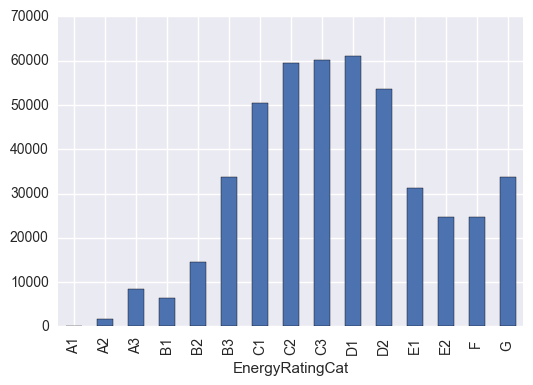

In [55]:
train_df.groupby('EnergyRatingCat')['EnergyRatingCat'].count().plot(kind = 'bar')

In [56]:
train_df['Year'].corr(train_df['EnergyRatingCont'])

-0.37791925151425265

In [57]:
train_df['GroundFloorArea'].corr(train_df['EnergyRatingCont'])

-0.18028369079969603

In [58]:
train_df['Year'].corr(train_df['EnergyRatingCont'])

-0.37791925151425265

In [59]:
numerics = ['float64', 'int64']
num_train_df = train_df.select_dtypes(include = numerics)

In [60]:
ER = num_train_df['EnergyRatingCont']

In [61]:
num_train_df.isnull().sum()

BuildingID                          0
Year                               12
EnergyRatingCont                   12
GroundFloorArea                 46172
AvgWallU                        46457
AvgRoofU                           12
AvgFloorU                          12
AvgWindowU                         12
AvgDoorU                           12
ExposedWallArea                    12
ExposedRoofArea                    12
TotFloorArea                       12
TotWindowArea                      12
TotDoorArea                        12
NStoreys                           12
MainSHEfficiency                51574
BuildingReg                        12
MainSHAdj                        5658
SecSHFrac                        5658
SecSHEfficiency                  5658
MainWHEfficiency                 5658
MainWHAdj                        5658
SecSHFuel                        5658
SecWHFuel                        5658
NChimneys                          12
NOpenFlues                         12
NFansVents  

In [62]:
cleaned_train_df = num_train_df.dropna(axis = 1, thresh = 100000)

In [63]:
cleaned_train_df.fillna(cleaned_train_df.mean(), inplace = True)

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


BuildingID    Year  EnergyRatingCont  GroundFloorArea  AvgWallU  \
0           190835  1890.0            418.42        52.040000  2.100000   
1           523113  1901.0            520.35       147.440000  2.010000   
2           271393  1968.0            281.33       104.840000  0.380000   
3           585961  2002.0            188.17        95.310000  0.550000   
4           624083  2002.0            134.95       283.870000  0.550000   
5            30231  2007.0            108.77        94.400000  0.340000   
6           350444  2003.0            156.65        76.150000  0.550000   
7           592196  2000.0            369.22        91.410000  0.550000   
8           365924  1989.0            287.42       125.610000  0.310000   
9           303002  2002.0            219.05       124.660000  0.550000   
10          634938  1900.0            747.86        80.000000  1.940000   
11          300824  1980.0            329.39       160.700000  1.090000   
12          449623  2001.0            242.38        69.680000  0.290000   
13          379988  1990.0            171.26       159.390000  0.580000   
14           68299  2003.0            191.70        99.290000  0.681326   
15          597104  1950.0            394.69       208.690000  0.681326   
16          163298  2005.0            175.42        40.370000  0.681326   
17           27910  1987.0            404.62        74.580000  0.570000   
18          217600  1965.0            607.69       109.000000  1.760000   
19          633383  2000.0            167.52        88.710000  0.300000   
20          590274  1999.0            145.17        82.980000  0.300000   
21          459725  1980.0            343.61       163.200000  0.681326   
22          425022  1974.0            244.83        67.220000  0.550000   
23          659767  1954.0            283.37       110.592702  1.250000   
24          435106  2004.0            214.47       113.100000  0.550000   
25          470158  1986.0            190.27        83.340000  0.350000   
26          361024  1998.0            111.43       110.592702  0.210000   
27          394252  1992.0            244.02        88.570000  0.600000   
28          191876  1932.0            215.73       110.592702  0.880000   
29           97620  2006.0            223.94        43.460000  0.310000   
...            ...     ...               ...              ...       ...   
464484      497682  2000.0            183.06        95.000000  0.550000   
464485      306847  1961.0            341.07       186.630000  0.920000   
464486      537767  2002.0            272.49        62.260000  0.310000   
464487      179261  1985.0            398.18        51.000000  0.550000   
464488      444219  2003.0            214.48       165.510000  0.550000   
464489      234726  1931.0            189.19        79.800000  0.270000   
464490      333955  1996.0            237.16        85.000000  0.290000   
464491      264101  2006.0            156.36        47.320000  0.370000   
464492      565931  2015.0             84.68        86.400000  0.320000   
464493      625102  1991.0            314.44        97.570000  0.570000   
464494      376867  2006.0            187.03       110.592702  0.370000   
464495      260949  2000.0            223.54        74.380000  0.681326   
464496      202772  1980.0            308.71        85.720000  1.100000   
464497      380219  2004.0            276.59       110.592702  0.320000   
464498      336403  1890.0            223.13       161.660000  1.400000   
464499      659017  1900.0            813.02        75.990000  1.990000   
464500      425823  1980.0            257.47        87.780000  0.280000   
464501      550879  2001.0            222.28       138.210000  0.270000   
464502      430974  1999.0            212.91        87.070000  0.300000   
464503       59536  1964.0            375.31        92.680000  1.930000   
464504      372299  1975.0            178.40       112.210000  0.590000   
464505      107251  1999.0       

In [64]:
corr_list = cleaned_train_df.corrwith(ER).abs().sort_values(ascending = False) 

In [65]:
rel_features = corr_list[corr_list > 0.2].index.tolist()
rel_features.append('BuildingID')
rel_features.append('EnergyRatingCat')

In [66]:
cleaned_train_df1 = cleaned_train_df

In [67]:
cleaned_train_df1['EnergyRatingCat'] = train_df['EnergyRatingCat']

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [68]:
cleaned_train_df1[rel_features].isnull().sum()

EnergyRatingCont           0
AvgRoofU                   0
AvgWallU                   0
Year                       0
AvgWindowU                 0
AvgFloorU                  0
ResponseCat                0
TempAdj                    0
DistLoss                   0
PumpsAndFansCO2            0
PumpsAndFansEnergy         0
PrimaryPumpsFansEnergy     0
BuildingReg                0
NCHPumps                   0
BuildingID                 0
EnergyRatingCat           12
dtype: int64

In [69]:
cleaned_train_df1.head()

BuildingID    Year  EnergyRatingCont  GroundFloorArea  AvgWallU  AvgRoofU  \
0      190835  1890.0            418.42            52.04      2.10      2.30   
1      523113  1901.0            520.35           147.44      2.01      0.75   
2      271393  1968.0            281.33           104.84      0.38      0.13   
3      585961  2002.0            188.17            95.31      0.55      0.26   
4      624083  2002.0            134.95           283.87      0.55      0.26   

   AvgFloorU  AvgWindowU  AvgDoorU  ExposedWallArea  ExposedRoofArea  \
0       0.61        2.71      3.00            32.78            73.08   
1       0.94        2.63      3.96           211.22            93.40   
2       0.68        2.81      0.00            94.41           104.84   
3       0.34        2.80      3.03            89.50            42.90   
4       0.41        3.10      3.01           254.15           173.21   

   TotFloorArea  TotWindowArea  TotDoorArea  NStoreys  MainSHEfficiency  \
0         33.69           7.08         2.05       2.0         85.700000   
1         96.77          37.00         5.95       2.0         65.000000   
2        104.84          17.90         0.00       1.0         70.000000   
3         52.41          13.92         2.60       2.0         78.000000   
4        173.21          42.86         5.49       2.0         86.349586   

   BuildingReg  MainSHAdj  SecSHFrac  SecSHEfficiency  MainWHEfficiency  \
0          0.0       0.95        0.1             65.0              85.7   
1          0.0       0.95        0.1             55.0              65.0   
2          0.0       0.95        0.1             60.0              70.0   
3          0.0       1.00        0.1             30.0              78.0   
4          0.0       1.00        0.0              0.0              92.4   

   MainWHAdj  SecSHFuel  SecWHFuel  NChimneys  NOpenFlues  NFansVents  \
0       0.95        1.0       28.0        0.0         1.0         1.0   
1       0.95       15.0       28.0        1.0         0.0         0.0   
2       0.95       15.0        1.0        0.0         1.0         1.0   
3       1.00        8.0       28.0        1.0         0.0         5.0   
4       1.00        1.0        1.0        0.0         0.0         3.0   

   PercDraughtStripped  NShelteredSides  PermTestResult  TempAdj  ControlCat  \
0                100.0              3.0             0.0      0.0         1.0   
1                100.0              0.0             0.0      0.6         1.0   
2                100.0              1.0             0.0      0.6         1.0   
3                100.0              2.0             0.0      0.0         3.0   
4                100.0              4.0             0.0      0.0         2.0   

   ResponseCat  NCHPumps  NGasFans  DistLoss  VolWaterStorage  TempFac  \
0          1.0       1.0       0.0   224.033            110.0      0.6   
1          1.0       1.0       0.0   428.635             95.0      0.6   
2          1.0       1.0       0.0   343.987            110.0      0.6   
3          1.0       1.0       1.0   323.551             95.0      0.6   
4          1.0       1.0       1.0   626.674            144.0      0.6   

   TempFacMult  HWInsulationThickness  LightingEnergy  PumpsAndFansEnergy  \
0          0.9                   20.0         274.752               230.0   
1          1.3                   35.0        1210.888               230.0   
2          1.3                   50.0         865.756               230.0   
3          0.9                   80.0         477.396               175.0   
4          0.9                   25.0        1678.062               175.0   

   MainWaterEnergy  PrimaryLightingEnergy  PrimaryPumpsFansEnergy  \
0         2595.201                741.830                   621.0   
1         4966.751               3269.398                   621.0   
2         6486.081               2337.541                   621.0   
3         4188.472               1288.969                   472.5   
4         5885

In [70]:
cleaned_train_df1 = cleaned_train_df1[rel_features]

In [71]:
cleaned_train_df1.isnull().sum()

EnergyRatingCont           0
AvgRoofU                   0
AvgWallU                   0
Year                       0
AvgWindowU                 0
AvgFloorU                  0
ResponseCat                0
TempAdj                    0
DistLoss                   0
PumpsAndFansCO2            0
PumpsAndFansEnergy         0
PrimaryPumpsFansEnergy     0
BuildingReg                0
NCHPumps                   0
BuildingID                 0
EnergyRatingCat           12
dtype: int64

In [72]:
cleaned_train_df1['AvgWallU'].fillna(cleaned_train_df1['AvgWallU'].mean(), inplace = True)

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [73]:
cleaned_train_df1 = cleaned_train_df1.dropna()

(0, 1000)

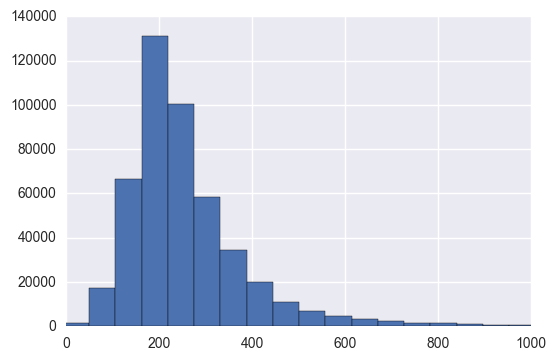

In [74]:
plt.hist(cleaned_train_df1['EnergyRatingCont'],bins =1000)
plt.xlim(0,1000)


In [75]:
removed_outliers = cleaned_train_df1[cleaned_train_df1['EnergyRatingCont'] < 800]

In [76]:
len(train_df), len(cleaned_train_df), len(cleaned_train_df1)

(464514, 464514, 464502)

In [77]:
cleaned_train_df1 = cleaned_train_df1.set_index('BuildingID')

In [78]:
cleaned_train_df1.head()

EnergyRatingCont  AvgRoofU  AvgWallU    Year  AvgWindowU  \
BuildingID                                                             
190835                418.42      2.30      2.10  1890.0        2.71   
523113                520.35      0.75      2.01  1901.0        2.63   
271393                281.33      0.13      0.38  1968.0        2.81   
585961                188.17      0.26      0.55  2002.0        2.80   
624083                134.95      0.26      0.55  2002.0        3.10   

            AvgFloorU  ResponseCat  TempAdj  DistLoss  PumpsAndFansCO2  \
BuildingID                                                               
190835           0.61          1.0      0.0   224.033          147.890   
523113           0.94          1.0      0.6   428.635          147.890   
271393           0.68          1.0      0.6   343.987          147.890   
585961           0.34          1.0      0.0   323.551          112.525   
624083           0.41          1.0      0.0   626.674          112.525   

            PumpsAndFansEnergy  PrimaryPumpsFansEnergy  BuildingReg  NCHPumps  \
BuildingID                                                                      
190835                   230.0                   621.0          0.0       1.0   
523113                   230.0                   621.0          0.0       1.0   
271393                   230.0                   621.0          0.0       1.0   
585961                   175.0                   472.5          0.0       1.0   
624083                   175.0                   472.5          0.0       1.0   

           EnergyRatingCat  
BuildingID                  
190835                  F   
523113                  G   
271393                  D2  
585961                  C2  
624083                  B3

In [79]:
cleaned_train_df1.dtypes

EnergyRatingCont          float64
AvgRoofU                  float64
AvgWallU                  float64
Year                      float64
AvgWindowU                float64
AvgFloorU                 float64
ResponseCat               float64
TempAdj                   float64
DistLoss                  float64
PumpsAndFansCO2           float64
PumpsAndFansEnergy        float64
PrimaryPumpsFansEnergy    float64
BuildingReg               float64
NCHPumps                  float64
EnergyRatingCat            object
dtype: object

In [80]:
features = rel_features

In [81]:
features[1:-2]

['AvgRoofU',
 'AvgWallU',
 'Year',
 'AvgWindowU',
 'AvgFloorU',
 'ResponseCat',
 'TempAdj',
 'DistLoss',
 'PumpsAndFansCO2',
 'PumpsAndFansEnergy',
 'PrimaryPumpsFansEnergy',
 'BuildingReg',
 'NCHPumps']

In [82]:
y = cleaned_train_df1['EnergyRatingCat']
x = cleaned_train_df1[features[1:-2]]

## Training Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [84]:
dt = DecisionTreeClassifier()

In [85]:
dt.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [86]:
dt.score(x,y)

0.98877292239861181

## Training Random Forest 

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rf = RandomForestClassifier(n_estimators=10)

In [89]:
rf.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [90]:
rf.score(x,y)

0.97319064288205437

## Training Neural Network

In [91]:
from sklearn.neural_network import MLPClassifier

In [92]:
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

In [93]:
nn.fit(x,y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [94]:
nn.score(x,y)

0.13161191986256249

### Importing test data 

In [95]:
test_df = pd.read_csv("data/testing.txt", sep = '\t', encoding = 'iso-8859-1')

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (98,99,100,111,114,115,116,118,119,120,121,123,124,125,126) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [96]:
test_df.head()

BuildingID      County                 Type     Year       RatingType  \
0      113207    Dublin 8            Apartment  Y2007.0  Final             
1      296305    Co. Cork    Mid-terrace house  Y1886.0  Existing          
2      230918    Dublin 2  Mid-floor apartment  Y1999.0  Existing          
3      645591    Dublin 1  Mid-floor apartment  Y2005.0  Existing          
4      495511  Co. Galway       Detached house  Y1992.0  Existing          

   EnergyRatingCat  EnergyRatingCont GroundFloorArea  AvgWallU  AvgRoofU  \
0              NaN               NaN      74.0 sq. m      0.61      0.00   
1              NaN               NaN     60.65 sq. m      1.25      0.33   
2              NaN               NaN       nan sq. m      0.55      0.00   
3              NaN               NaN      67.7 sq. m      0.33      0.00   
4              NaN               NaN       nan sq. m      0.37      0.33   

   AvgFloorU  AvgWindowU  AvgDoorU  ExposedWallArea  ExposedRoofArea  \
0       0.00        1.50      3.00            26.00             0.00   
1       0.52        2.80      2.78            30.27            37.81   
2       0.00        2.80      0.00            21.12             0.00   
3       0.00        2.00      1.36            32.53             0.00   
4       0.57        3.13      3.00           164.92           120.60   

   TotFloorArea  TotWindowArea  TotDoorArea  NStoreys  \
0          0.00          25.00         1.85       1.0   
1         33.59           4.66         3.85       2.0   
2          0.00           8.78         0.00       1.0   
3          0.00          22.71         2.27       1.0   
4        113.54          34.32         2.53       2.0   

                       MainSHFuel                      MainWHFuel  \
0  Mains Gas                       Mains Gas                        
1  Mains Gas                       Mains Gas                        
2  Electricity                     Electricity                      
3                             NaN                             NaN   
4  Heating Oil                     Heating Oil                      

   MainSHEfficiency SharedMPRN  BuildingReg  MainSHAdj  SecSHFrac  \
0              83.0         NO          1.0       1.00        0.0   
1              90.3         NO          0.0       1.00        0.1   
2               NaN         NO          0.0       1.00        0.0   
3               NaN         NO          0.0        NaN        NaN   
4               NaN         NO          0.0       0.95        0.1   

   SecSHEfficiency  MainWHEfficiency  MainWHAdj  SecSHFuel  SecWHFuel  \
0              0.0              83.0       1.00        1.0        1.0   
1             60.0              90.3       1.00        8.0        1.0   
2              0.0             100.0       1.00        1.0        1.0   
3              NaN               NaN        NaN        NaN        NaN   
4             30.0              60.0       0.95       15.0       28.0   

   NChimneys  NOpenFlues  NFansVents DLobby     VentMethod  \
0        0.0         0.0         4.0    YES  Natural vent.   
1        0.0         1.0         1.0     NO  Natural vent.   
2        0.0         0.0         3.0    YES  Natural vent.   
3        0.0         0.0         4.0    YES  Natural vent.   
4        1.0         1.0         2.0    YES  Natural vent.   

                    WallStructure                   SuspWoodFloor  \
0  Masonry                         No                               
1  Masonry                         No                               
2  Masonry                         No                               
3  Insulated Conctete Form         No                               
4  Masonry                         No                               

   PercDraughtStripped  NShelteredSides PermTest  PermTestResult  TempAdj  \
0                100.0              3.0       NO             0.0      0.0   
1                100.0              4.0       NO             0.0      0.0   
2                100.0   

In [97]:
test_df['Year'] = pd.to_numeric(test_df['Year'].str.replace('Y',''), errors = 'coerce')
test_df['GroundFloorArea'] = pd.to_numeric(test_df['GroundFloorArea'].str.replace('sq. m',''), errors = 'coerce')
num_test_df = test_df.select_dtypes(include = numerics)
cleaned_test_df = num_test_df.dropna(axis = 1, thresh = 100000)
cleaned_test_df.fillna(cleaned_test_df.mean(), inplace = True)

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


BuildingID    Year  GroundFloorArea  AvgWallU  AvgRoofU  AvgFloorU  \
0           113207  2007.0        74.000000  0.610000      0.00       0.00   
1           296305  1886.0        60.650000  1.250000      0.33       0.52   
2           230918  1999.0       110.631939  0.550000      0.00       0.00   
3           645591  2005.0        67.700000  0.330000      0.00       0.00   
4           495511  1992.0       110.631939  0.370000      0.33       0.57   
5           654979  1999.0       100.360000  0.550000      0.40       0.41   
6           579296  1975.0       107.230000  0.250000      0.40       0.57   
7            63152  2009.0        83.500000  0.230000      0.00       0.20   
8           279722  2001.0       218.620000  0.550000      0.36       0.41   
9           281193  2003.0       110.631939  0.540000      0.27       0.44   
10          360534  1920.0       153.340000  0.490000      0.38       0.44   
11          624215  2004.0        94.500000  0.550000      0.27       0.60   
12          320600  1920.0        84.810000  1.720000      0.60       0.55   
13          255814  2012.0       115.680000  0.230000      0.12       0.15   
14          273218  1940.0        95.930000  0.910000      0.13       0.75   
15          138261  1969.0       110.631939  0.270000      1.76       0.62   
16          483646  2000.0        99.750000  0.290000      0.13       0.44   
17          543493  2007.0        94.000000  0.370000      0.38       0.37   
18          256092  1976.0        96.940000  2.400000      0.26       0.73   
19          457749  2007.0       256.960000  0.370000      0.26       0.31   
20          182886  1997.0        75.440000  0.550000      0.40       0.36   
21          138177  1980.0        95.900000  0.600000      0.31       0.57   
22          600781  2007.0       104.160000  0.370000      0.25       0.37   
23          450688  2008.0        74.200000  0.710000      0.00       0.37   
24          556253  1954.0        94.490000  0.600000      0.21       0.78   
25           82588  2001.0        57.950000  0.550000      0.35       0.00   
26          298648  1940.0       110.631939  0.686519      0.13       0.73   
27          635807  1950.0        53.640000  2.200000      2.30       0.61   
28          643291  1978.0       146.200000  0.270000      0.28       0.45   
29          429197  2005.0        65.280000  0.360000      0.00       0.00   
...            ...     ...              ...       ...       ...        ...   
159232      128537  1980.0       151.200000  0.330000      0.16       0.48   
159233       73144  2001.0        94.000000  0.550000      0.26       0.00   
159234      540637  2014.0       110.631939  0.686519      0.11       0.17   
159235      104757  1983.0       107.440000  0.580000      0.28       0.55   
159236      577291  1981.0       127.300000  0.600000      0.40       0.52   
159237      241715  1990.0        22.750000  0.600000      0.45       0.70   
159238      638242  1977.0       118.560000  1.650000      0.39       0.53   
159239      659395  2005.0       112.260000  0.550000      0.36       0.41   
159240       78033  2003.0        83.300000  0.380000      0.35       0.00   
159241      158973  2006.0        70.250000  0.360000      0.00       0.00   
159242      403995  2000.0       110.631939  0.686519      0.36       0.41   
159243      382206  1900.0        49.430000  0.270000      1.10       0.50   
159244      428613  1900.0        81.190000  1.970000      2.30       0.92   
159245      196239  1958.0        93.380000  0.290000      0.13       0.45   
159246      437697  2003.0       110.631939  0.550000      0.13       0.41   
159247      426173  2005.0       103.970000  0.370000      0.40       0.34   
159248      362490  1981.0        81.240000  0.270000      0.16       0.64   
159249      292803  1952.0        50.000000  0.686519      2.30       0.94   
159250      199995  1969.0       131.040000  1.900000      1.24       0.85   
159251      627360  1989.0    

In [98]:
cleaned_test_df1 = cleaned_test_df[features[1:-2]]
cleaned_test_df1.head()

AvgRoofU  AvgWallU    Year  AvgWindowU  AvgFloorU  ResponseCat  TempAdj  \
0      0.00      0.61  2007.0        1.50       0.00          1.0      0.0   
1      0.33      1.25  1886.0        2.80       0.52          1.0      0.0   
2      0.00      0.55  1999.0        2.80       0.00          4.0      0.3   
3      0.00      0.33  2005.0        2.00       0.00          1.0      0.0   
4      0.33      0.37  1992.0        3.13       0.57          1.0      0.6   

   DistLoss  PumpsAndFansCO2  PumpsAndFansEnergy  PrimaryPumpsFansEnergy  \
0   275.952          112.525               175.0                   472.5   
1   244.718          112.525               175.0                   472.5   
2     0.000           83.590               130.0                   351.0   
3   261.332            0.000                 0.0                     0.0   
4   510.874          147.890               230.0                   621.0   

   BuildingReg  NCHPumps  
0          1.0       1.0  
1          0.0       1.0  
2          0.0       1.0  
3          0.0       0.0  
4          0.0       1.0

In [99]:
x_test = cleaned_test_df1

In [100]:
out = dt.predict(x_test)

In [101]:
len(out), len(x_test)

(159262, 159262)

In [102]:
out

array(['B3', 'C2', 'C3', ..., 'G ', 'C1', 'C3'], dtype=object)

In [103]:
cleaned_test_df['EnergyRatingCat']= out

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [104]:
test_groups = cleaned_test_df.groupby("EnergyRatingCat")['EnergyRatingCat'].count()

In [105]:
train_groups = train_df.groupby('EnergyRatingCat')['EnergyRatingCat'].count()

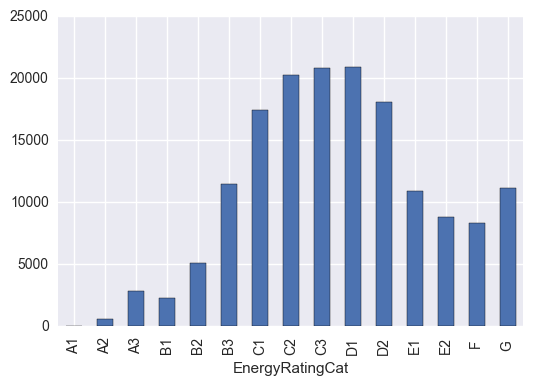

In [106]:
cleaned_test_df.groupby("EnergyRatingCat")['EnergyRatingCat'].count().plot(kind = 'bar')

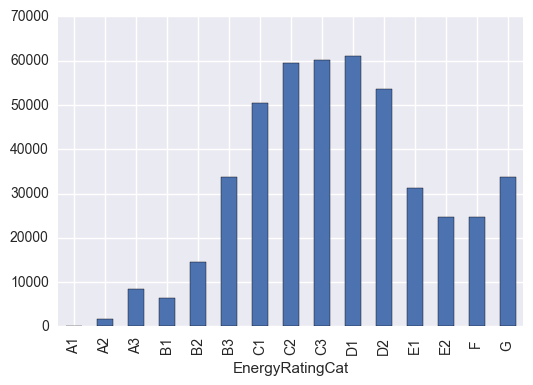

In [107]:
train_df.groupby('EnergyRatingCat')['EnergyRatingCat'].count().plot(kind = 'bar')

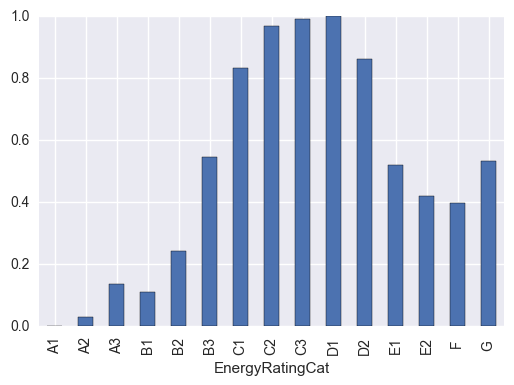

In [108]:
(test_groups/test_groups.max()).plot(kind = 'bar')

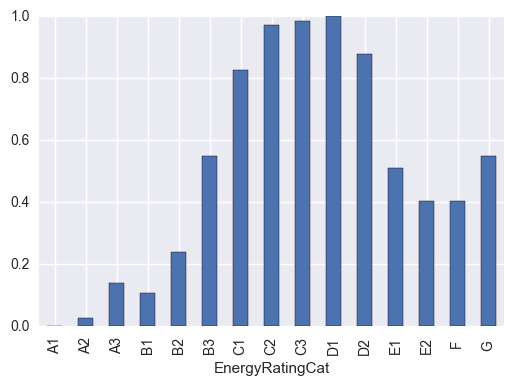

In [109]:
(train_groups/train_groups.max()).plot(kind = 'bar')

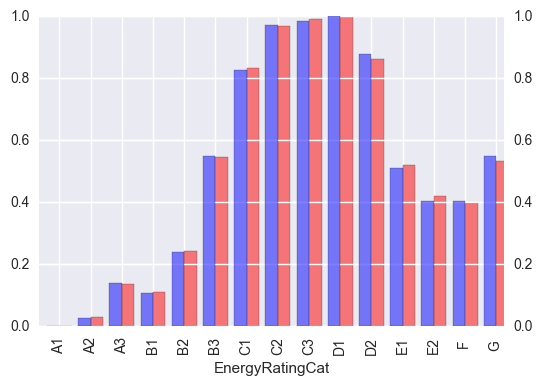

In [110]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = 0.4
(test_groups/test_groups.max()).plot(kind = 'bar', ax = ax, alpha = 0.5, color = 'red', position = 0, width = width)
(train_groups/train_groups.max()).plot(kind = 'bar', ax = ax2, alpha = 0.5, color = 'blue', position = 1, width = width)


In [111]:
from sklearn.model_selection import cross_val_score

In [126]:
cross_val_score(dt, x, y, cv = 3)

array([ 0.37283648,  0.37601157,  0.37442598])

In [114]:
cross_val_score(rf, x, y, cv = 3 )

array([ 0.41094678,  0.41258646,  0.41217085])

In [116]:
from sklearn.model_selection import cross_val_predict

In [117]:
y_train_pred = cross_val_predict(rf, x, y, cv =3)

In [121]:
from sklearn.metrics import confusion_matrix

In [123]:
conf_mx = confusion_matrix(y, y_train_pred)

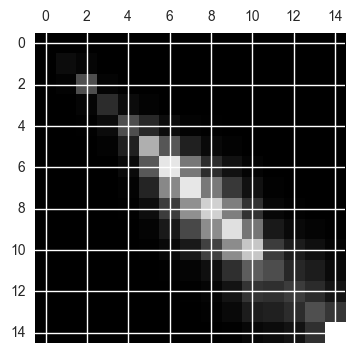

In [124]:
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()

Need to investigate the source of the errors. Perhaps need to clean the data more and add more features, and actually utilise the categorical fields. 